In [146]:
import os


import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression as LR

import pandas as pd
from pingouin import mixed_anova, anova, pairwise_tukey, pairwise_tests, rm_anova
from statsmodels.regression.mixed_linear_model import MixedLM

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice

plt.rcParams['pdf.fonttype']=42
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:


sess = u.load_single_day(ko_mice[5],0)

{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}


In [148]:
maxval = (2**16)/2



(512, 796)
27629.41393470764


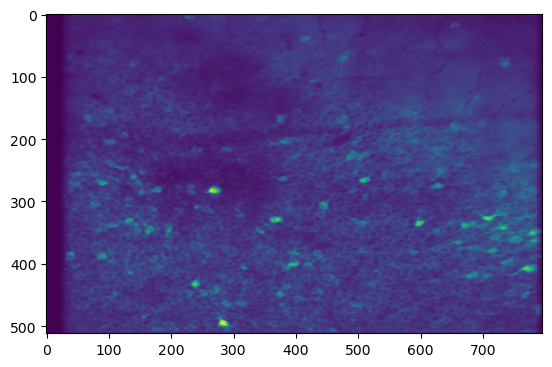

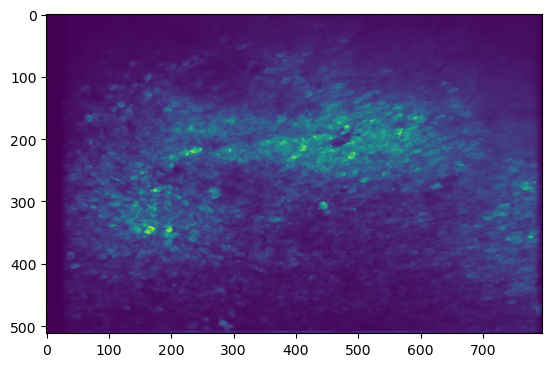

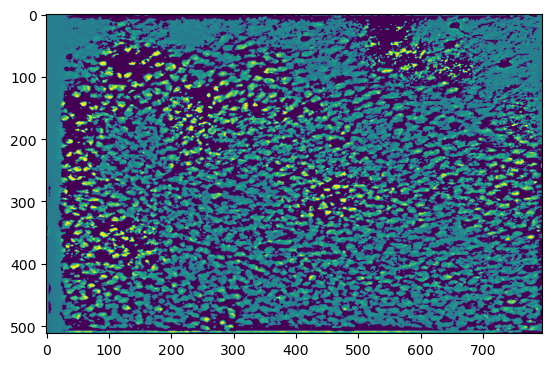

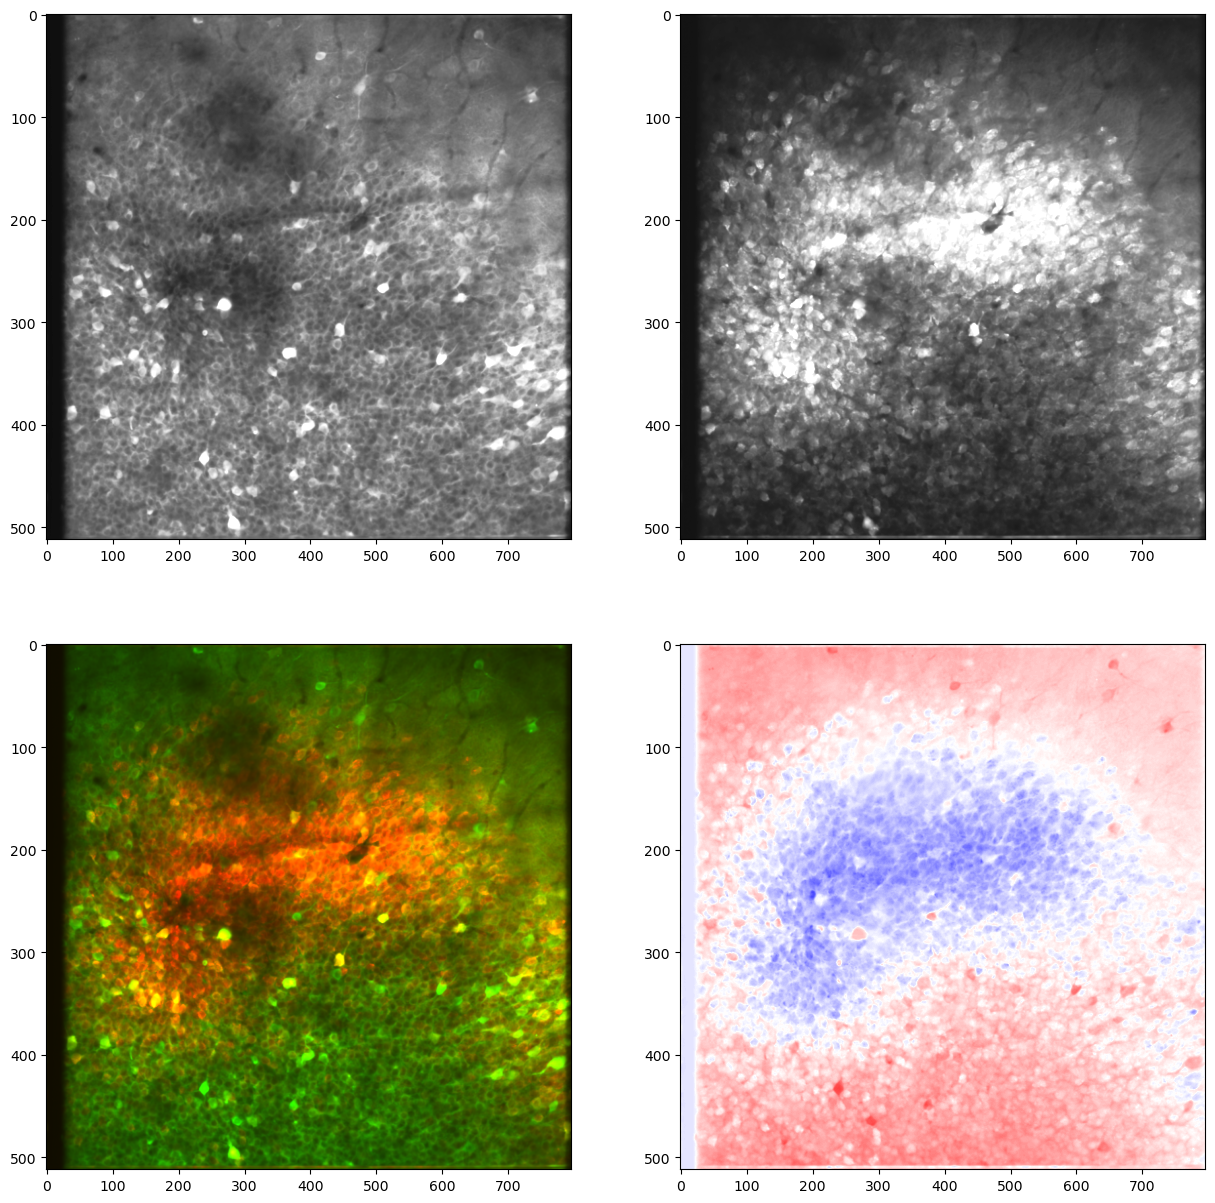

In [149]:
%matplotlib inline
fig, ax = plt.subplots()
ax.imshow(sess.s2p_ops['meanImg'])

fig, ax = plt.subplots()
ax.imshow(sess.s2p_ops['meanImg_chan2'])

fig, ax = plt.subplots()
ax.imshow(np.minimum(sess.s2p_ops['meanImg_chan2_corrected'], np.nanpercentile(sess.s2p_ops['meanImg_chan2_corrected'],99)))

fig, ax = plt.subplots(2,2, figsize = [15,15])
print(sess.s2p_ops['meanImg'].shape)
img = np.zeros([512,796,3])
img[:,:,0] = sess.s2p_ops['meanImg_chan2']
img[:,:,1]=sess.s2p_ops['meanImg']
img /= maxval
print(np.amax(sess.s2p_ops['meanImg']))
ax[0,0].imshow(sess.s2p_ops['meanImg']/maxval, vmin=0, vmax=.4, cmap='Greys_r', aspect= 796/512)
ax[0,1].imshow(sess.s2p_ops['meanImg_chan2']/maxval, vmin=0, vmax=.4, cmap='Greys_r', aspect= 796/512)
ax[1,1].imshow(np.log(sess.s2p_ops['meanImg']/sess.s2p_ops['meanImg_chan2']), vmin=-5, vmax=5, cmap='seismic', aspect= 796/512)
tmp_img = np.copy(img)
tmp_img[tmp_img>.4]=.4
tmp_img = tmp_img/.4
ax[1,0].imshow(tmp_img, vmin=0, vmax=.4, aspect= 796/512)